<h1 style="text-align:center;">Visual Analysis of Document Similarity</h1>

#### About the Data: Hobbies Corpus 

Baleen corpus contains 448 files in 5 categories. Structured as:

- 7,420 paragraphs (16.562 mean paragraphs per file)
- 14,251 sentences (1.921 mean sentences per paragraph).

Word count of 288,520 with a vocabulary of 23,738 (12.154 lexical diversity).
Corpus scan took 14 seconds.

#### Category Breakdown 

The categories in this corpus have the following properties:

#### Documents and File Size 

- books: 72 docs (4.1MiB)
- cinema: 100 docs (9.2MiB)
- cooking: 30 docs (3.0MiB)
- gaming: 128 docs (8.8MiB)
- sports: 118 docs (15.9MiB)

#### Document Structure 

- books: 844 paragraphs and 2,030 sentences
- cinema: 1,475 paragraphs and 3,047 sentences
- cooking: 1,190 paragraphs and 2,425 sentences
- gaming: 1,802 paragraphs and 3,373 sentences
- sports: 2,109 paragraphs and 3,376 sentences

#### Words and Vocabulary

- books: 41,851 words with a vocabulary size of 7,838
- cinema: 69,153 words with a vocabulary size of 10,274
- cooking: 37,854 words with a vocabulary size of 5,038
- gaming: 70,778 words with a vocabulary size of 9,120
- sports: 68,884 words with a vocabulary size of 8,028


**The Machine Learning Problem:**

Given a set of $n$ samples of data such that each sample is represented by more than a single number (e.g. multivariate data has several attributes o features), create a model that is able to predit unknown properties of each sample.

**Spatial interpretation:**

Given data points in a bounded, high dimensional space, define regions of decisions for any point in that space. 

<img src="spatial.png" align="left"></img>

<img src="feature_space.png" align="left"></img>

### Task 1: Load the Corpus

In [18]:
from textDB import load_data
corpus = load_data('hobbies')

In [19]:
corpus.categories

['books', 'cinema', 'cooking', 'gaming', 'sports']

### Task 2: Vectorize the Documents

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
docs = vectorizer.fit_transform(corpus.data)
labels = corpus.target

In [22]:
docs.shape

(448, 21379)

### Task 3: t-SNE: Clustering Similar Documents with Squared Euclidean Distance And Euclidean Distance

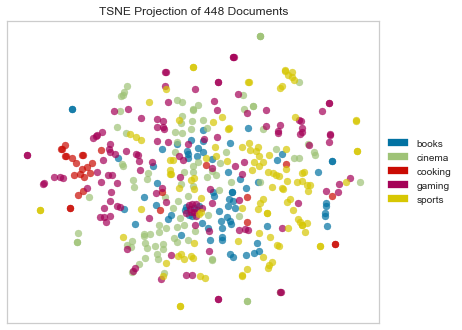

In [25]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(size=(600,400))
tsne.fit(docs, labels)
tsne.poof()



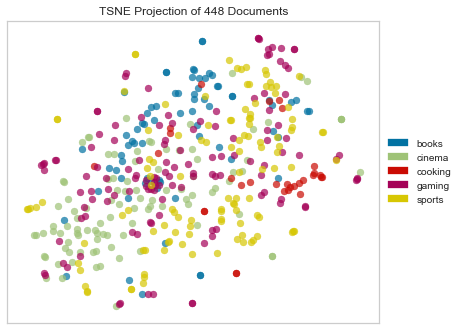

In [26]:
tsne = TSNEVisualizer(size=(600,400),metrics ="euclidean")
tsne.fit(docs, labels)
tsne.poof()



<h3 align="center"> Distance Metrics for Non-Numerical Inputs</h3>

In [27]:
# Examples of distance metrics
distance_functions = [
    "braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine",
    "dice", "euclidean", "hamming", "jaccard", "kulsinski", "mahalanobis",
    "matching", "minkowski", "rogerstanimoto", "russellrao", "seuclidean",
    "sokalmichener", "sokalsneath", "sqeuclidean", "yule"
    ]


We could try them all, but several of them just don't make sense in the context of text data. Let's go through them individually:


### Task 4: Manhattan (aka “Taxicab” or “City Block”) Distance

![Alt-text](https://upload.wikimedia.org/wikipedia/commons/0/08/Manhattan_distance.svg "By User:Psychonaut - Created by User:Psychonaut with XFig, Public Domain, https://commons.wikimedia.org/w/index.php?curid=731390")

**Properties of Metrics**:
1. $\text{d}(a,b) \geq 0$ (**non-negativity**)
2. $\text{d}(a,b)=0 \text{ if and only if } a=b$ (**identity**)
3. $\text{d}(a,b)= \text{d}(b,a)$ (**symmetry**)
4. $\text{d}(a,b) \leq \text{d}(a,c)+ \text{d}(c,b)$ (**traingle inequality**)

**Manhattan Distace**:

Consider two vectors $a=(a_1,a_2,...,a_d$ and $b=(b_1,b_2,...,b_d)$ in $\mathbb{R}^d$. The Manhattan distance or $L_1$ distance is $$\text{d}_1(a,b)= \left \|a-b\right \|_1 =  \sum_{i=1}\left | a_i -b_i \right |$$

In [31]:
tnse = TSNEVisualizer(metrics="cityblock", size=(600,400))
tsne.fit(docs, labels)
tsne.poof()

<Figure size 600x400 with 0 Axes>

### Task 5: Bray Curtis Dissimilarity and Canberra Distance

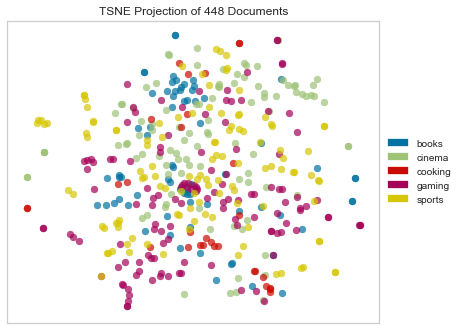

In [32]:
tsne = TSNEVisualizer(metrics="braycurtis",size = (600,400))
tsne.fit(docs,labels).poof()

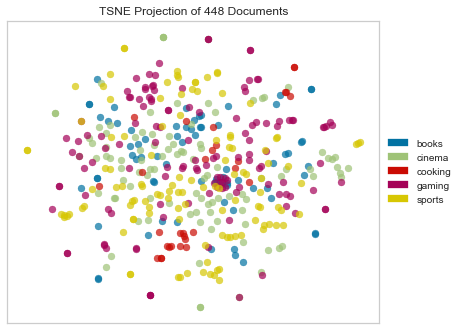

In [33]:
tsne = TSNEVisualizer(metrics="canberra",size = (600,400))
tsne.fit(docs,labels).poof()

### Task 6: Cosine Distance
<img src="consine_distance.png" align="left"></img>

The angle between two documents:
$$\cos(\overline{X},\overline{Y})=\frac{\sum_{i=1}^{d} x_{i}y_{i}}{\sqrt{\sum_{i=1}^{d}x_{i}^2} \sqrt{\sum_{i=1}^{d}y_{i}^2}}$$

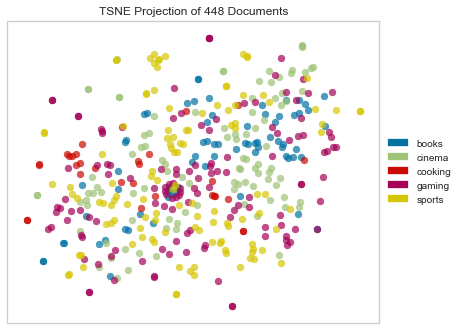

In [34]:
tsne = TSNEVisualizer(metrics="cosine",size = (600,400))
tsne.fit(docs,labels).poof()

### Task 7:What metrics not to use?

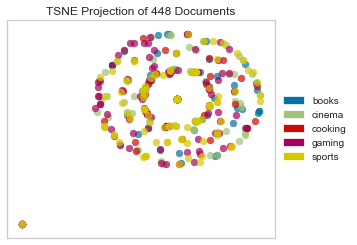

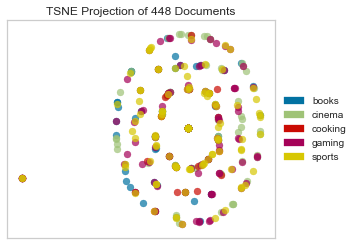

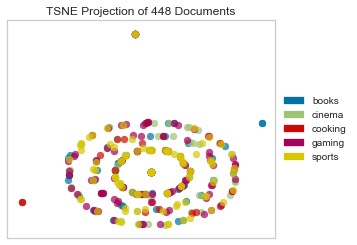

In [38]:
distance_funcations = ["sokalmichener", "rogerstanimoto", "hamming"]
for metric in distance_funcations:
    tsne = TSNEVisualizer(metric = metric)
    tsne.fit(docs, labels).poof()

If we omit the target during fit, we can visualize the whole dataset to see if any meaningful patterns are observed.

### Task 8: Omitting Class Labels - Using KMeans Clustering

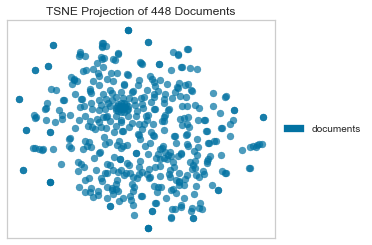

In [41]:
# Don't color points with their classes
tsne = TSNEVisualizer(labels=["documents"])
tsne.fit(docs).poof()



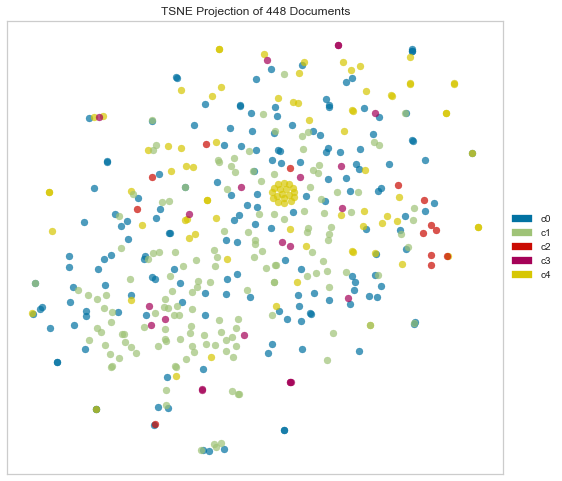

In [46]:
# Apply clustering instead of class names.
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5)
clusters.fit(docs)

tsne = TSNEVisualizer(size=(800,600))
tsne.fit(docs,["c{}".format(c) for c in clusters.labels_])
tsne.poof()
